In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
# 데이터 불러오기
df =  pd.read_csv('./data/Car_Purchasing_Data.csv')

In [7]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
# 나이대는 20살부터 70살까지, 연봉은 20000달러부터 100000달러까지

# 각 컬럼의 최대값 / 최소값을 확인할 수 있다.

In [15]:
# 나이가 가장 어린 사람의 데이터를 확인해보자
df['Age'] == df['Age'].min()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Age, Length: 500, dtype: bool

In [16]:
df.loc[df['Age'] == df['Age'].min(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.0,70467.29492,100.0,494606.6334,28645.39425


In [17]:
# 연봉이 가장 높은 사람은, 얼마짜리 차를 샀는가?
df['Annual Salary'].max()

np.float64(100000.0)

In [18]:
df['Annual Salary'] == df['Annual Salary'].max()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Annual Salary, Length: 500, dtype: bool

In [19]:
df.loc[df['Annual Salary'] == df['Annual Salary'].max(),]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


In [20]:
# 상관관계분석

In [22]:
df.corr(numeric_only=True)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


<Axes: >

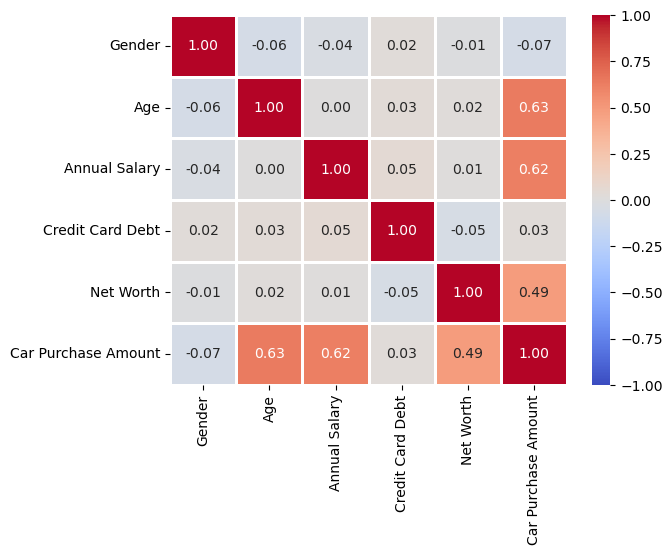

In [29]:
sb.heatmap(data = df.corr(numeric_only=True), vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.8)

In [30]:
# 나이와 연봉이 자동차 구매 금액과 가장 관련이 높다.

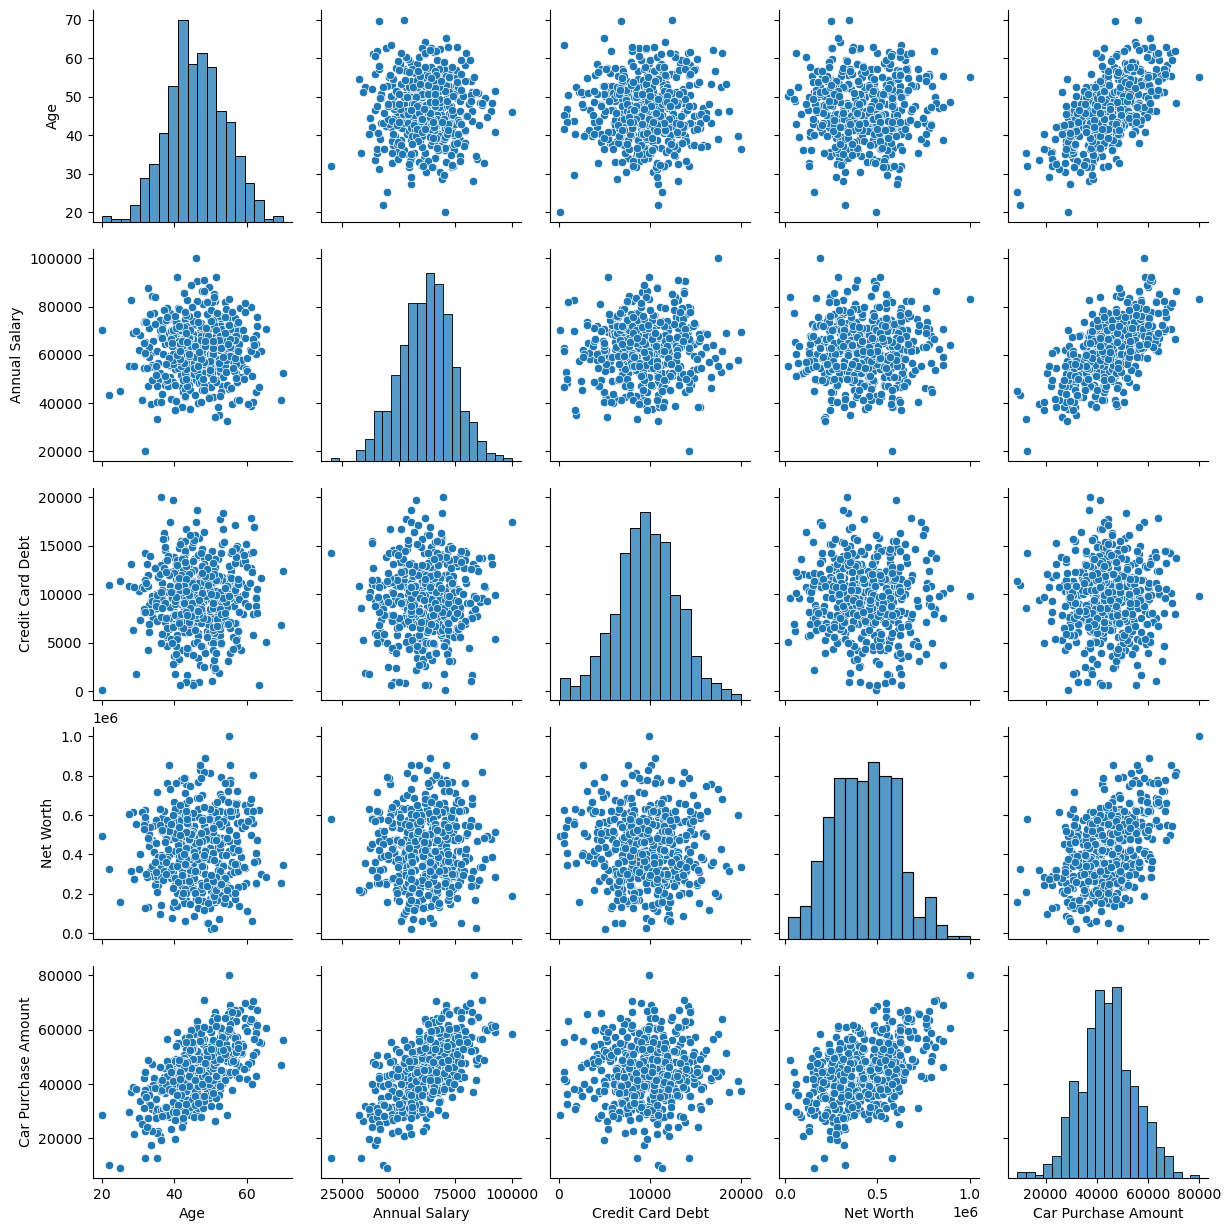

In [34]:
sb.pairplot(data=df, vars = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount'])

In [35]:
# AI 만들기. 자동차 구매 금액을 예측하는 인공지능을 만들자.

In [36]:
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [37]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [38]:
y = df['Car Purchase Amount']

In [40]:
df['Country'].nunique()

211

In [41]:
df.shape

(500, 9)

In [42]:
df['Country'].value_counts()

Country
Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barth?emy        5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: count, Length: 211, dtype: int64

In [43]:
X = df.loc[ : , 'Gender':'Net Worth']

In [45]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [46]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [47]:
# 수치예측하는것이므로, Regression 모델을 사용해야 한다.

In [48]:
# 1. 리니어 리그레션, 랜덤포레스트 리그레션, XGboost 리그레션
# 2. 딥러닝으로 ANN

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor = LinearRegression()

In [56]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
y_pred = regressor.predict(X_test)

In [64]:
((y_test - y_pred)**2).mean()

np.float64(2.7933992922684716)

In [65]:
from sklearn.metrics import mean_squared_error, f1_score

In [66]:
mean_squared_error(y_test, y_pred)

2.7933992922684716

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
regressor2 = RandomForestRegressor()

In [76]:
regressor2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_pred2 = regressor2.predict(X_test)

In [78]:
mean_squared_error(y_test, y_pred2)

5767649.742253219

In [81]:
from xgboost import XGBRegressor

In [82]:
regressor3 = XGBRegressor()

In [83]:
regressor3.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [84]:
y_pred3 = regressor3.predict(X_test)

In [85]:
mean_squared_error(y_test, y_pred3)

5160166.040505806

In [86]:
### R2으로 0 ~ 1 사이 값으로도 나타내보자.

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_score(y_test, y_pred)

0.9999999667332884

In [89]:
r2_score(y_test, y_pred2)

0.9313128126012457

In [91]:
r2_score(y_test, y_pred3)

0.9385473619806801

In [92]:
# 가장 성능이 뛰어난 regressor를 파일로 저장한다.
import joblib

In [93]:
joblib.dump(regressor, './model/regressor.pkl')

['./model/regressor.pkl']